# CPU time of LLCS Algorithms

To generate a new results.json benchmark file, run the following command in the project's root directory:
```bash
./cmake-build-debug/benchmark/Bench_LLCS --benchmark_out=results.json --benchmark_out_format=json
cp cmake-build-debug/benchmark/results.json docs/LLCS_Bench/results.json
```

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
plt.rcParams.update({
    "font.size": 14,           # Grundschriftgröße
    "axes.titlesize": 16,      # Achsentitel
    "axes.labelsize": 14,      # Achsenbeschriftung
    "xtick.labelsize": 12,     # Tick-Beschriftung x
    "ytick.labelsize": 12,     # Tick-Beschriftung y
    "legend.fontsize": 12,     # Legende
})

In [3]:
# Load the JSON file
with open('results_fine.json') as f:
    data = json.load(f)

In [4]:
benchmarks = data['benchmarks']
df = pd.DataFrame(benchmarks)
df[['series', 'N', 'M']] = df['name'].str.split('/', n=2, expand=True)
df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,series,N,M
0,BM_LLCS2_MC_k/1,0,0,BM_LLCS2_MC_k/1,iteration,1,0,1,560,1.279543e+06,1.311384e+06,ns,BM_LLCS2_MC_k,1,None
1,BM_LLCS2_MC_k/11,0,1,BM_LLCS2_MC_k/11,iteration,1,0,1,64,1.062784e+07,1.049805e+07,ns,BM_LLCS2_MC_k,11,None
2,BM_LLCS2_MC_k/21,0,2,BM_LLCS2_MC_k/21,iteration,1,0,1,34,2.105889e+07,2.022059e+07,ns,BM_LLCS2_MC_k,21,None
3,BM_LLCS2_MC_k/31,0,3,BM_LLCS2_MC_k/31,iteration,1,0,1,22,2.979944e+07,3.053977e+07,ns,BM_LLCS2_MC_k,31,None
4,BM_LLCS2_MC_k/41,0,4,BM_LLCS2_MC_k/41,iteration,1,0,1,17,3.883416e+07,3.952206e+07,ns,BM_LLCS2_MC_k,41,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,BM_LLCS2_SA_RMQ_sig/16,4,14,BM_LLCS2_SA_RMQ_sig/16,iteration,1,0,1,1,5.655071e+08,5.625000e+08,ns,BM_LLCS2_SA_RMQ_sig,16,None
100,BM_LLCS2_SA_RMQ_sig/17,4,15,BM_LLCS2_SA_RMQ_sig/17,iteration,1,0,1,1,6.408914e+08,6.250000e+08,ns,BM_LLCS2_SA_RMQ_sig,17,None
101,BM_LLCS2_SA_RMQ_sig/18,4,16,BM_LLCS2_SA_RMQ_sig/18,iteration,1,0,1,1,7.695962e+08,7.656250e+08,ns,BM_LLCS2_SA_RMQ_sig,18,None
102,BM_LLCS2_SA_RMQ_sig/19,4,17,BM_LLCS2_SA_RMQ_sig/19,iteration,1,0,1,1,8.384061e+08,8.281250e+08,ns,BM_LLCS2_SA_RMQ_sig,19,None


## CPU Time of LLCS2_MC_O1C_SYNC with MC_1C Constraint

Note: The `plot_cpu_time_over_NM` assumes that the unit in `results.json` is nanoseconds

In [5]:
def plot_cpu_time_over_NM(df, series_name, aggfunc="mean"):
    df_filtered = df[df['series'] == series_name].copy()
    df_filtered['N'] = pd.to_numeric(df_filtered['N'], errors='coerce')
    df_filtered['M'] = pd.to_numeric(df_filtered['M'], errors='coerce')
    df_filtered.dropna(subset=['N', 'M'], inplace=True)
    df_filtered['NM'] = df_filtered['N'] * df_filtered['M']
    
    df_grouped = df_filtered.groupby("NM", as_index=False).agg({"cpu_time": aggfunc})
    df_grouped.sort_values(by="NM", inplace=True)

    ax = df_grouped.plot(
        x='NM', y='cpu_time',
        kind='line', marker='o',
        figsize=(10, 6), grid=True, label=f'{series_name}'
    )

    ax.set_xlabel('Input Size $N \\times M$')   # mit LaTeX
    ax.set_ylabel('CPU Zeit [ns]')
    #ax.set_title(f'CPU Zeit über $N \\times M$ für {series_name}', pad=10)
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

    #plt.tight_layout()
    #plt.savefig(f"{series_name}_cpu_time.png", dpi=300, bbox_inches="tight")
    plt.savefig(f"{series_name}_cpu_time.eps", format="eps", bbox_inches="tight")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


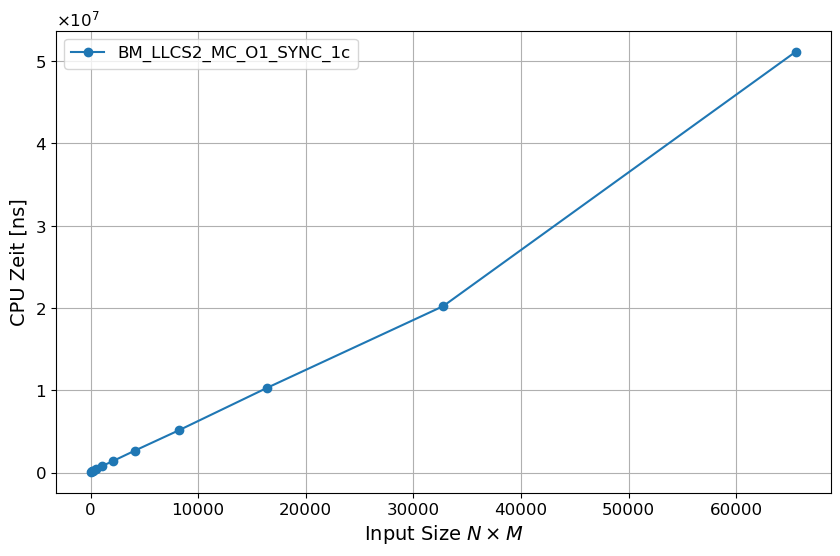

In [6]:
plot_cpu_time_over_NM(df, 'BM_LLCS2_MC_O1_SYNC_1c')

## CPU Time over Problem Specific Parameters

In [17]:
from matplotlib.ticker import MaxNLocator

In [18]:
def plot_cpu_time_over_k(df, series_name, x_name , aggfunc="mean"):
    df_filtered = df[df['series'] == series_name].copy()
    df_filtered['N'] = pd.to_numeric(df_filtered['N'], errors='coerce')
    df_filtered.dropna(subset=['N'], inplace=True)
    
    df_grouped = df_filtered.groupby("N", as_index=False).agg({"cpu_time": aggfunc})
    df_grouped.sort_values(by="N", inplace=True)

    ax = df_grouped.plot(
        x='N', y='cpu_time',
        kind='line', marker='o',
        figsize=(10, 6), grid=True, label=f'{series_name}'
    )

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel(x_name)
    ax.set_ylabel('CPU Zeit [ns]')
    ax.get_yaxis().set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

    #plt.tight_layout()
    #plt.savefig(f"{series_name}_cpu_time.png", dpi=300, bbox_inches="tight")
    plt.savefig(f"{series_name}_cpu_time.eps", format="eps", bbox_inches="tight")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


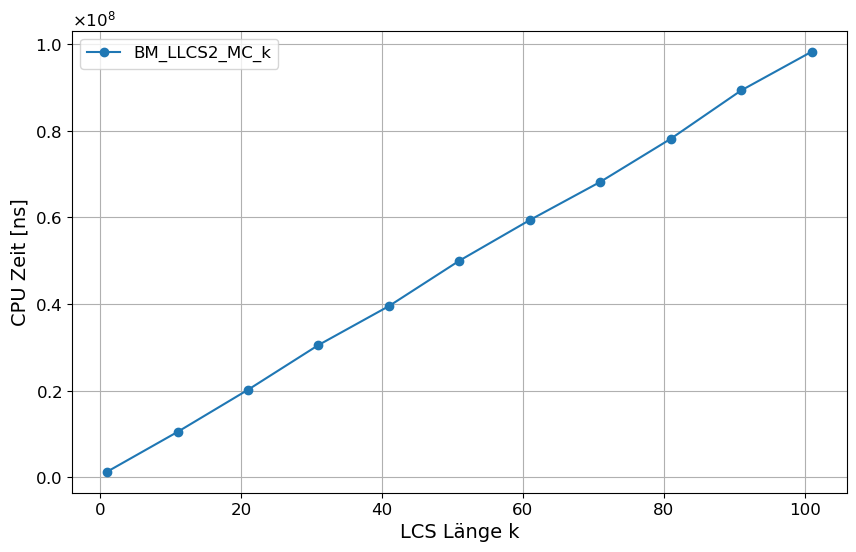

In [9]:
plot_cpu_time_over_k(df, 'BM_LLCS2_MC_k', 'LCS Länge k')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


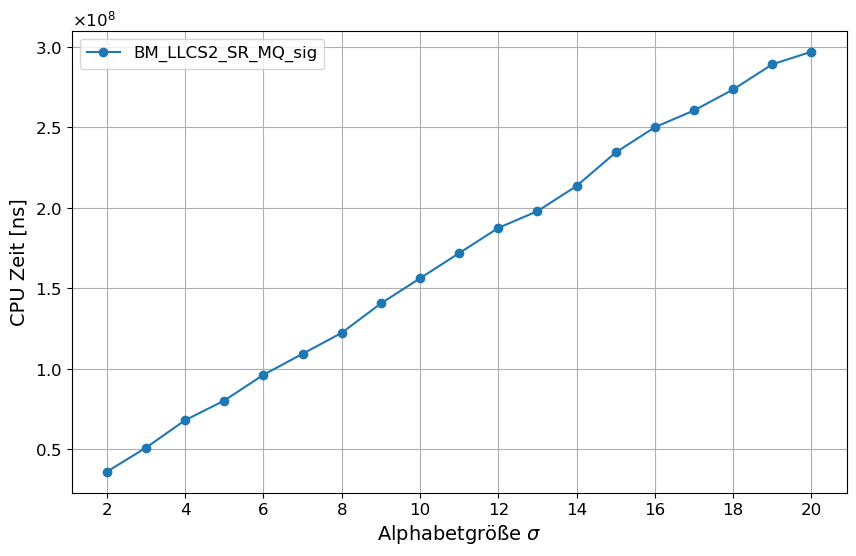

In [19]:
plot_cpu_time_over_k(df, 'BM_LLCS2_SR_MQ_sig', r'Alphabetgröße $\sigma$')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


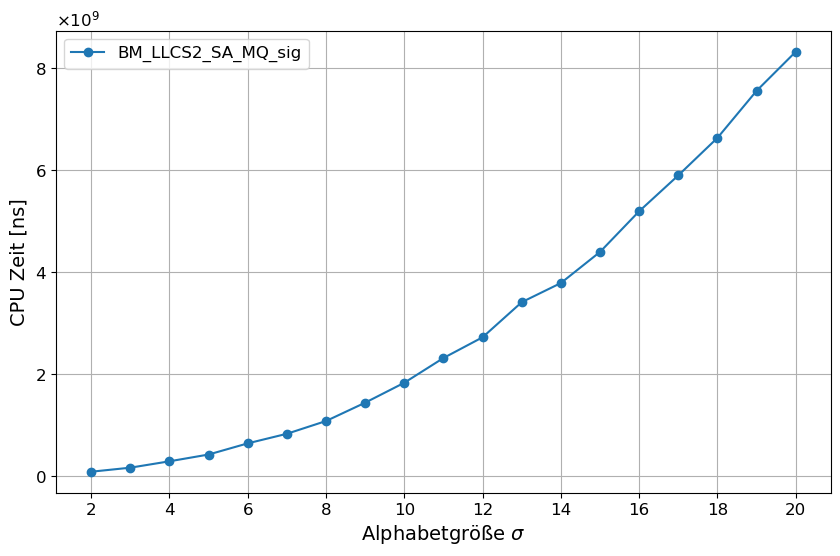

In [20]:
plot_cpu_time_over_k(df, 'BM_LLCS2_SA_MQ_sig', r'Alphabetgröße $\sigma$')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


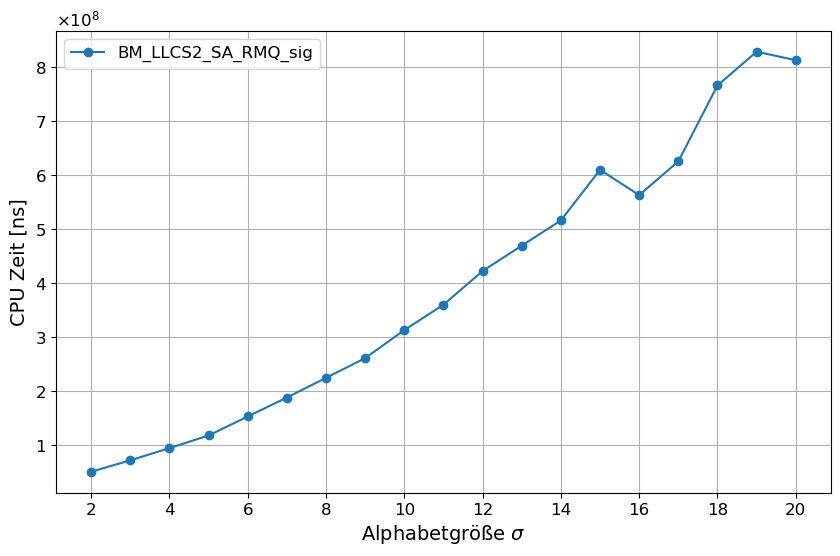

In [21]:
plot_cpu_time_over_k(df, 'BM_LLCS2_SA_RMQ_sig', r'Alphabetgröße $\sigma$')